In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval
except Exception:
    pass

In [2]:
# Load the functions from DataEval that are helpful for bias
# as well as the VOCDetection dataset for the tutorial
from dataeval.metrics.bias import balance, diversity, parity
from dataeval.utils.data import collate
from dataeval.utils.data.datasets import VOCDetection
from dataeval.utils.metadata import merge, preprocess

In [3]:
# Download the 2011 train dataset and verify the size of the loaded dataset
ds = VOCDetection(root="./data", year="2011", image_set="train", download=True)
len(ds)

Using downloaded and verified file: ./data/VOCtrainval_25-May-2011.tar
Extracting ./data/VOCtrainval_25-May-2011.tar to ./data


5717

In [4]:
# Extract the raw_metadata from the dataset
raw_metadata = collate(ds)[2]

# Check the metadata structure
raw_metadata[0]

{'annotation': {'folder': 'VOC2011',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

In [5]:
# Merge the dataset metadata entries into a single metadata dictionary
merged = merge(metadata=raw_metadata, image_index_key="filename")

/dataeval/src/dataeval/utils/metadata.py:428: UserWarning: Metadata entries were dropped:
    annotation_object_part: ['nested_list']
  warnings.warn(f"Metadata entries were dropped:\n{dropped_items}")


In [6]:
{k: v[:2] for k, v in merged.items()}

{'folder': ['VOC2011', 'VOC2011'],
 'filename': ['2008_000008.jpg', '2008_000008.jpg'],
 'database': ['The VOC2008 Database', 'The VOC2008 Database'],
 'annotation': ['PASCAL VOC2008', 'PASCAL VOC2008'],
 'image': ['flickr', 'flickr'],
 'width': [500, 500],
 'height': [442, 442],
 'depth': [3, 3],
 'segmented': [0, 0],
 'name': ['horse', 'person'],
 'pose': ['Left', 'Unspecified'],
 'truncated': [0, 1],
 'occluded': [1, 0],
 'xmin': [53, 158],
 'ymin': [87, 44],
 'xmax': [471, 289],
 'ymax': [420, 167],
 'difficult': [0, 0]}

In [7]:
metadata = preprocess(
    metadata=merged,
    class_labels="name",
    continuous_factor_bins={"width": 5, "height": 5, "xmin": 5, "ymin": 5, "xmax": 5, "ymax": 5},
    exclude=["folder", "filename", "database", "annotation", "image", "depth"],
    image_index_key="filename",
)

In [8]:
bal = balance(metadata)

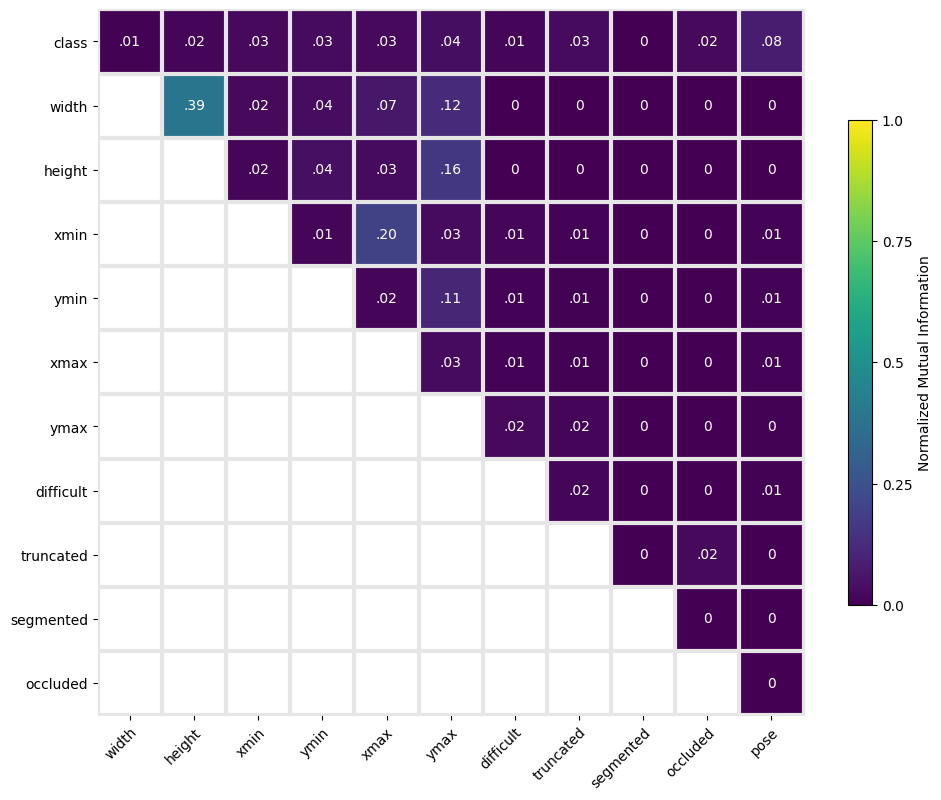

In [9]:
_ = bal.plot()

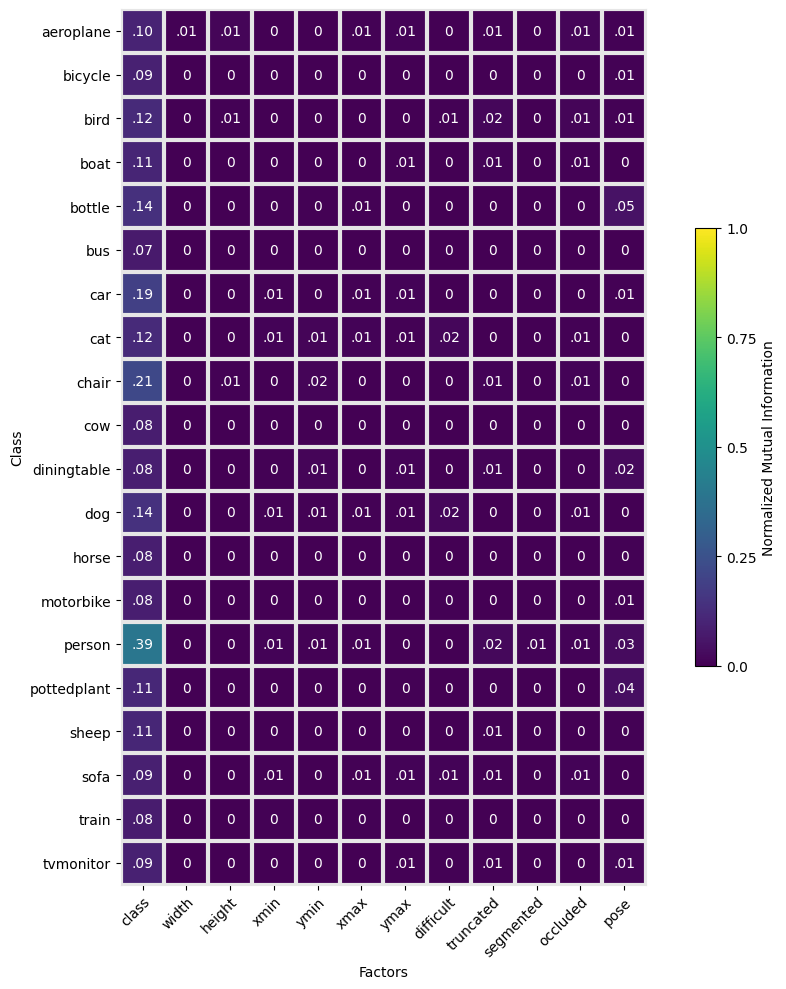

In [10]:
_ = bal.plot(plot_classwise=True)

In [11]:
div = diversity(metadata)

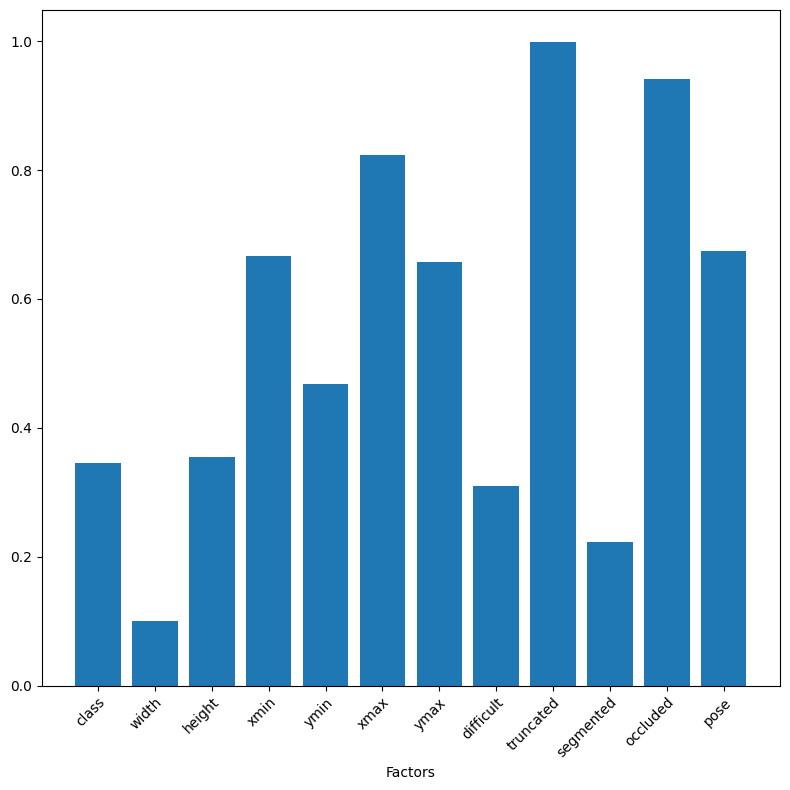

In [12]:
_ = div.plot()

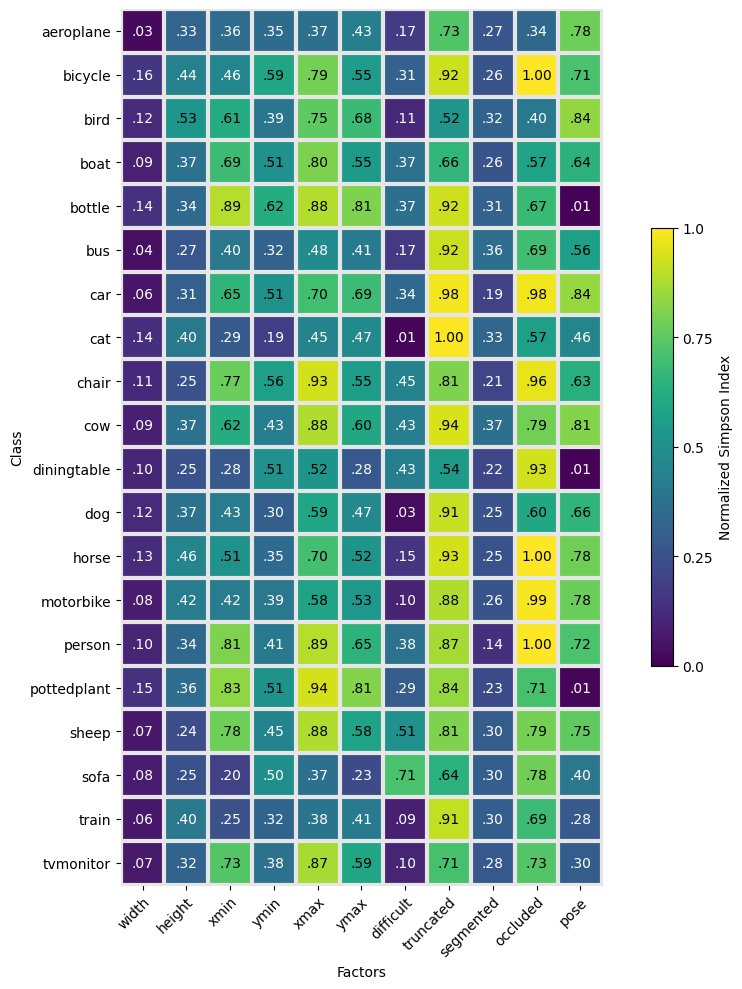

In [13]:
_ = div.plot(plot_classwise=True)

In [14]:
par = parity(metadata)

/dataeval/src/dataeval/metrics/bias/_parity.py:329: UserWarning: Some factors did not meet the recommended 5 occurrences for each value-label combination.
  warnings.warn("Some factors did not meet the recommended 5 occurrences for each value-label combination.")


In [15]:
par.to_dataframe()

,score,p-value
width,354.43,0.0
height,923.09,0.0
xmin,1477.26,0.0
ymin,1658.90,0.0
xmax,1574.21,0.0
ymax,2118.26,0.0
difficult,529.53,0.0
truncated,1413.02,0.0
segmented,158.47,0.0
occluded,1166.67,0.0
